In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [89]:
circle_data = pd.read_csv("../circle_image.csv")
ellipse_data = pd.read_csv("../eclipse_image.csv")
all_circle_node = pd.read_csv("../all_circle_nodes.csv")


In [90]:
circle_data.head()

,shape_name,shape_id,node_id,x,y,radius
0,binary_image,1,1,273,15,16.278821
1,binary_image,2,2,477,13,14.000000
2,binary_image,3,3,672,84,10.440307
3,binary_image,4,4,565,275,12.000000
4,binary_image,4,5,589,345,32.310989


In [100]:
max_shape_id = max(
    circle_data['shape_id'].max(),
    ellipse_data['shape_id'].max(),
    all_circle_node['shape_id'].max()
)
shape_ids = list(range(1, max_shape_id + 1))

In [101]:
avg_radius_per_shape = circle_data.groupby('shape_id')['radius'].mean()
overall_avg_radius = circle_data['radius'].mean()
avg_radius_per_shape_filled = avg_radius_per_shape.reindex(shape_ids).fillna(overall_avg_radius)
avg_radius_per_shape_filled_array = avg_radius_per_shape_filled.reset_index().values
avg_radius_per_shape_filled_array


array([[ 1.        , 16.2788206 ],
       [ 2.        , 14.        ],
       [ 3.        , 10.44030651],
       [ 4.        , 17.07329763],
       [ 5.        , 10.64198703],
       [ 6.        , 14.45743399],
       [ 7.        , 17.02938637],
       [ 8.        , 18.60051842],
       [ 9.        , 14.45743399],
       [10.        ,  7.07106781],
       [11.        , 14.45743399],
       [12.        ,  6.32455532],
       [13.        , 14.45743399],
       [14.        , 14.45743399],
       [15.        ,  8.60232527],
       [16.        , 10.81665383],
       [17.        , 18.68154169],
       [18.        , 13.34166406],
       [19.        , 14.45743399],
       [20.        , 14.45743399],
       [21.        , 14.45743399],
       [22.        , 25.29822128],
       [23.        , 14.45743399],
       [24.        ,  6.32455532],
       [25.        , 14.45743399],
       [26.        , 14.45743399],
       [27.        , 15.5       ],
       [28.        , 14.45743399],
       [29.        ,

In [102]:
ellipse_data.head()

,shape_name,shape_id,pair_id,x,y,semi_major,semi_minor,angle
0,binary_image,1,1,265,8,10.259142,5.129571,43.025066
1,binary_image,1,2,287,7,16.324828,8.162414,152.650124
2,binary_image,1,3,264,37,24.233242,12.116621,111.801409
3,binary_image,2,4,485,6,10.700467,5.350234,142.594643
4,binary_image,2,5,466,7,12.298374,6.149187,26.565051


In [103]:
avg_ellipse_per_shape = ellipse_data.groupby('shape_id')['semi_major'].mean()
overall_avg_semi_major = ellipse_data['semi_major'].mean()
avg_ellipse_per_shape_filled = avg_ellipse_per_shape.reindex(shape_ids).fillna(overall_avg_semi_major)
avg_ellipse_per_shape_filled_array = avg_ellipse_per_shape_filled.reset_index().values
avg_ellipse_per_shape_filled_array


array([[ 1.        , 16.93907054],
       [ 2.        , 17.95246313],
       [ 3.        ,  5.1179572 ],
       [ 4.        , 17.64278123],
       [ 5.        ,  5.47815613],
       [ 6.        ,  3.        ],
       [ 7.        , 25.86622132],
       [ 8.        ,  6.2014195 ],
       [ 9.        ,  2.6925824 ],
       [10.        ,  7.26886194],
       [11.        ,  2.12132034],
       [12.        ,  4.59066729],
       [13.        ,  5.09901951],
       [14.        ,  1.58113883],
       [15.        , 20.62087635],
       [16.        ,  9.24755118],
       [17.        , 24.80591613],
       [18.        ,  7.18132061],
       [19.        , 23.16246964],
       [20.        , 12.10907315],
       [21.        , 12.10907315],
       [22.        , 22.58275674],
       [23.        ,  6.02079729],
       [24.        ,  5.42391228],
       [25.        ,  1.58113883],
       [26.        ,  1.41421356],
       [27.        , 12.03785504],
       [28.        ,  1.58113883],
       [29.        ,

In [104]:
all_circle_node.head()

,node_id,shape_id,x,y,radius
0,0,1,263,5,7.000000
1,1,1,295,5,7.280110
2,2,1,288,8,13.453624
3,3,1,282,10,16.278821
4,4,1,273,18,17.088007


In [105]:
avg_node_radius_per_shape = all_circle_node.groupby('shape_id')['radius'].mean()
overall_avg_node_radius = all_circle_node['radius'].mean()
avg_node_radius_per_shape_filled = avg_node_radius_per_shape.reindex(shape_ids).fillna(overall_avg_node_radius)
avg_node_radius_per_shape_filled_array = avg_node_radius_per_shape_filled.reset_index().values
avg_node_radius_per_shape_filled_array


array([[ 1.        , 12.58784561],
       [ 2.        ,  9.61391745],
       [ 3.        ,  7.48224167],
       [ 4.        , 13.8850088 ],
       [ 5.        ,  7.67509342],
       [ 6.        , 11.29771   ],
       [ 7.        ,  9.94647048],
       [ 8.        , 10.42599487],
       [ 9.        ,  5.        ],
       [10.        ,  5.28897114],
       [11.        ,  1.        ],
       [12.        ,  4.23296957],
       [13.        ,  4.73606798],
       [14.        ,  1.        ],
       [15.        , 11.6701907 ],
       [16.        ,  6.8690921 ],
       [17.        , 14.84098271],
       [18.        ,  9.16241125],
       [19.        ,  7.78820926],
       [20.        ,  2.        ],
       [21.        ,  3.60555128],
       [22.        , 14.59150318],
       [23.        ,  2.        ],
       [24.        ,  4.98606798],
       [25.        ,  1.        ],
       [26.        ,  3.        ],
       [27.        , 12.83698382],
       [28.        ,  2.23606798],
       [29.        ,

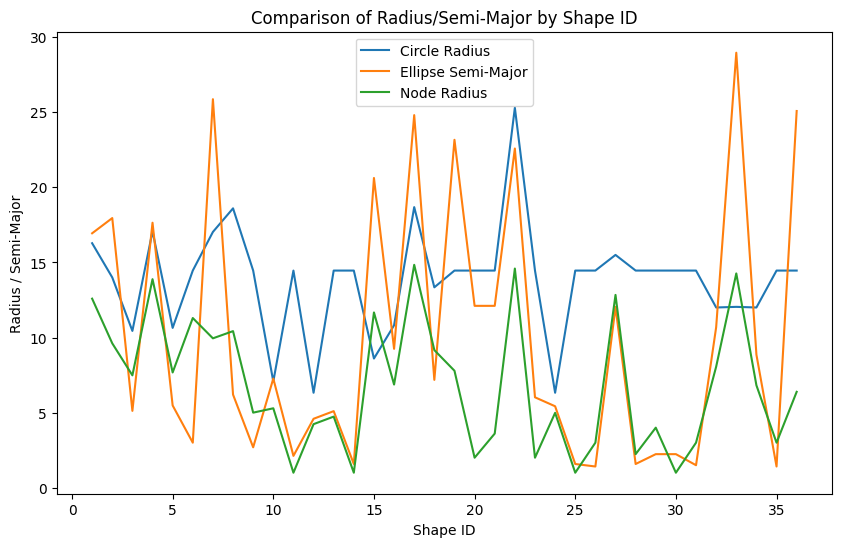

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(avg_radius_per_shape_filled_array[:, 0], avg_radius_per_shape_filled_array[:, 1], label='Circle Radius')
plt.plot(avg_ellipse_per_shape_filled_array[:, 0], avg_ellipse_per_shape_filled_array[:, 1], label='Ellipse Semi-Major')
plt.plot(avg_node_radius_per_shape_filled_array[:, 0], avg_node_radius_per_shape_filled_array[:, 1], label='Node Radius')
plt.xlabel('Shape ID')
plt.ylabel('Radius / Semi-Major')
plt.title('Comparison of Radius/Semi-Major by Shape ID')
plt.legend()
plt.show()

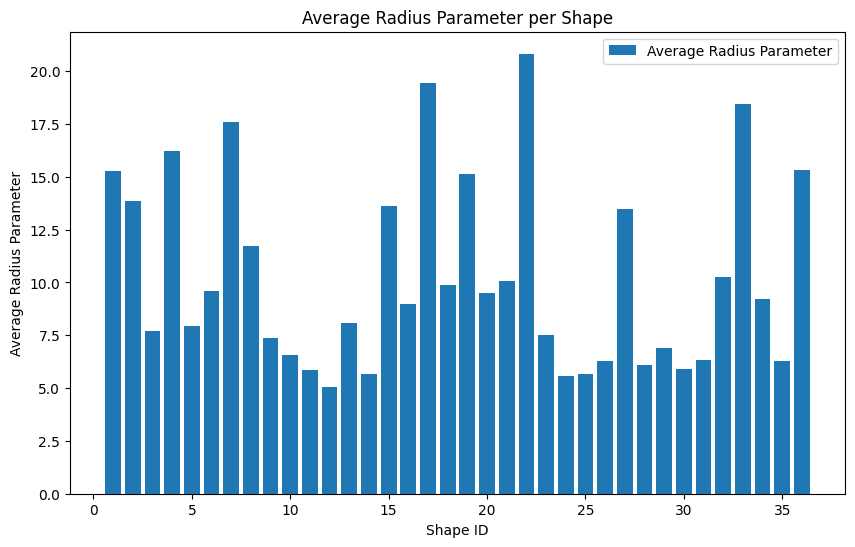

In [107]:
avg_circle_list = [avg_radius_per_shape_filled.get(sid, float('nan')) for sid in shape_ids]
avg_ellipse_list = [avg_ellipse_per_shape_filled.get(sid, float('nan')) for sid in shape_ids]
avg_node_list = [avg_node_radius_per_shape_filled.get(sid, float('nan')) for sid in shape_ids]

average_radius_param_per_shape = [(c + e + n) / 3 for c, e, n in zip(avg_circle_list, avg_ellipse_list, avg_node_list)]

plt.figure(figsize=(10, 6))
plt.bar(shape_ids, average_radius_param_per_shape, label='Average Radius Parameter')
plt.xlabel('Shape ID')
plt.ylabel('Average Radius Parameter')
plt.title('Average Radius Parameter per Shape')
plt.legend()
plt.show()

     shape_name  shape_id  node_id    x    y     radius
0  binary_image         1        1  273   15  16.278821
1  binary_image         2        2  477   13  14.000000
2  binary_image         3        3  672   84  10.440307
3  binary_image         4        4  565  275  12.000000
4  binary_image         4        5  589  345  32.310989
     shape_name  shape_id  pair_id    x   y  semi_major  semi_minor  \
0  binary_image         1        1  265   8   10.259142    5.129571   
1  binary_image         1        2  287   7   16.324828    8.162414   
2  binary_image         1        3  264  37   24.233242   12.116621   
3  binary_image         2        4  485   6   10.700467    5.350234   
4  binary_image         2        5  466   7   12.298374    6.149187   

        angle  
0   43.025066  
1  152.650124  
2  111.801409  
3  142.594643  
4   26.565051  
   node_id  shape_id    x   y     radius
0        0         1  263   5   7.000000
1        1         1  295   5   7.280110
2        2        

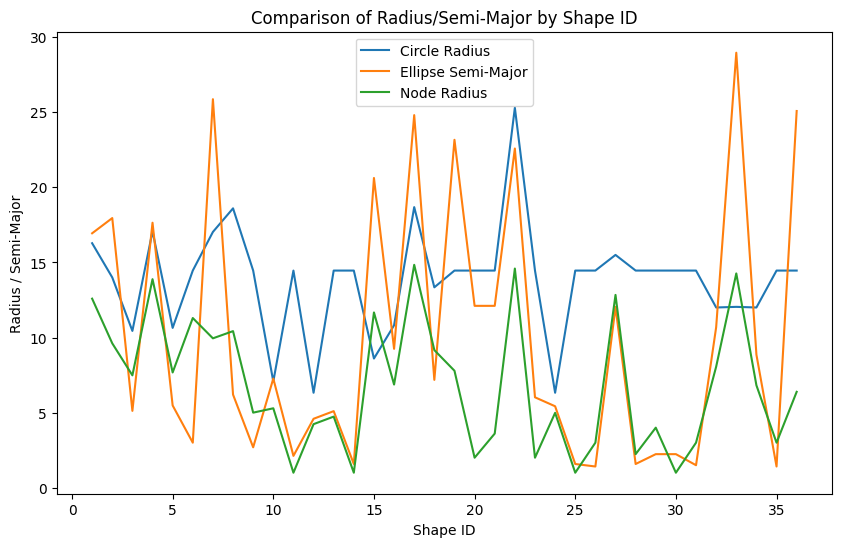

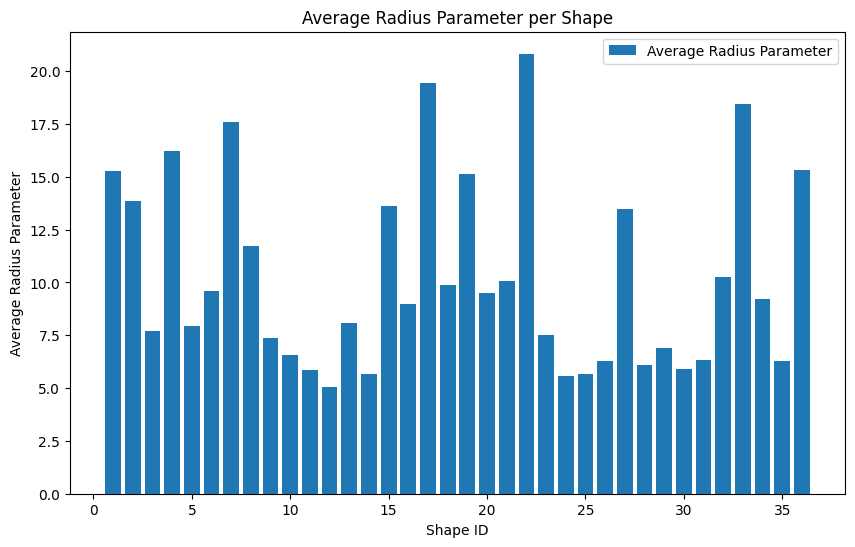

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load data
circle_data = pd.read_csv("../circle_image.csv")
ellipse_data = pd.read_csv("../eclipse_image.csv")
all_circle_node = pd.read_csv("../all_circle_nodes.csv")

# Preview data
print(circle_data.head())
print(ellipse_data.head())
print(all_circle_node.head())

# Prepare shape ids
max_shape_id = max(
    circle_data['shape_id'].max(),
    ellipse_data['shape_id'].max(),
    all_circle_node['shape_id'].max()
)
shape_ids = list(range(1, max_shape_id + 1))

# Circle radius per shape
avg_radius_per_shape = circle_data.groupby('shape_id')['radius'].mean()
overall_avg_radius = circle_data['radius'].mean()
avg_radius_per_shape_filled = avg_radius_per_shape.reindex(shape_ids).fillna(overall_avg_radius)
avg_radius_per_shape_filled_array = avg_radius_per_shape_filled.reset_index().values

# Ellipse semi-major per shape
avg_ellipse_per_shape = ellipse_data.groupby('shape_id')['semi_major'].mean()
overall_avg_semi_major = ellipse_data['semi_major'].mean()
avg_ellipse_per_shape_filled = avg_ellipse_per_shape.reindex(shape_ids).fillna(overall_avg_semi_major)
avg_ellipse_per_shape_filled_array = avg_ellipse_per_shape_filled.reset_index().values

# Node radius per shape
avg_node_radius_per_shape = all_circle_node.groupby('shape_id')['radius'].mean()
overall_avg_node_radius = all_circle_node['radius'].mean()
avg_node_radius_per_shape_filled = avg_node_radius_per_shape.reindex(shape_ids).fillna(overall_avg_node_radius)
avg_node_radius_per_shape_filled_array = avg_node_radius_per_shape_filled.reset_index().values

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(avg_radius_per_shape_filled_array[:, 0], avg_radius_per_shape_filled_array[:, 1], label='Circle Radius')
plt.plot(avg_ellipse_per_shape_filled_array[:, 0], avg_ellipse_per_shape_filled_array[:, 1], label='Ellipse Semi-Major')
plt.plot(avg_node_radius_per_shape_filled_array[:, 0], avg_node_radius_per_shape_filled_array[:, 1], label='Node Radius')
plt.xlabel('Shape ID')
plt.ylabel('Radius / Semi-Major')
plt.title('Comparison of Radius/Semi-Major by Shape ID')
plt.legend()
plt.show()

# Prepare lists for average parameter
avg_circle_list = [avg_radius_per_shape_filled.get(sid, float('nan')) for sid in shape_ids]
avg_ellipse_list = [avg_ellipse_per_shape_filled.get(sid, float('nan')) for sid in shape_ids]
avg_node_list = [avg_node_radius_per_shape_filled.get(sid, float('nan')) for sid in shape_ids]

average_radius_param_per_shape = [(c + e + n) / 3 for c, e, n in zip(avg_circle_list, avg_ellipse_list, avg_node_list)]

# Plot average radius parameter
plt.figure(figsize=(10, 6))
plt.bar(shape_ids, average_radius_param_per_shape, label='Average Radius Parameter')
plt.xlabel('Shape ID')
plt.ylabel('Average Radius Parameter')
plt.title('Average Radius Parameter per Shape')
plt.legend()
plt.show()